# aSPEM Experiment : analysis



TODO: clean-up garder blocs indep full R

TODO: moulinette statistique ? https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test https://en.wikipedia.org/wiki/Earth_mover%27s_distance

TODO: https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

TODO: tester qu'à chaque pause, l'agent se réinitialise à $\hat{p}=.5$

In [1]:
%run 0_parameters.ipynb


WELCOME



In [2]:
import pickle
import glob
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [4]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

# find_h_with_MI

In [5]:
def mask_nan(h_va, h_bet, r_va, r_bet) :
    r_va = np.ma.masked_array(r_va, mask=np.isnan(h_bet)).compressed()
    h_va = np.ma.masked_array(h_va, mask=np.isnan(h_bet)).compressed()

    r_bet = np.ma.masked_array(r_bet, mask=np.isnan(h_bet)).compressed()
    h_bet = np.ma.masked_array(h_bet, mask=np.isnan(h_bet)).compressed()

    r_bet = np.ma.masked_array(r_bet, mask=np.isnan(h_va)).compressed()
    h_bet = np.ma.masked_array(h_bet, mask=np.isnan(h_va)).compressed()
    
    r_va = np.ma.masked_array(r_va, mask=np.isnan(h_va)).compressed()
    h_va = np.ma.masked_array(h_va, mask=np.isnan(h_va)).compressed()
    
    return h_va, h_bet, r_va, r_bet

In [6]:
suj = ['AM', 'BMC', 'CS', 'DC', 'FM', 'IP', 'LB', 'OP', 'RS', 'SR',  'TN', 'YK']

list_suj = {'AM': 'F', 'BMC': 'M', 'CS': 'F', 'DC': 'F',
            'FM': 'F', 'IP': 'F',  'LB': 'F', 'OP': 'M',
            'RS': 'M', 'SR': 'F',  'TN': 'M', 'YK': 'M'}

In [7]:
from matplotlib.patches import Polygon


In [8]:
def plot_fig(recording, max_tau=None, coupe=[1/500, 1/200], pourcentage=0.99, triangle=True) :
    
    
    
    if triangle is True : from matplotlib.patches import Polygon
    #fig, ax = plt.subplots(3,1,figsize=(15,20))
    Full = e.Full_list(modes_bcp=[])
    list_h = recording['list_h'][:max_tau]
    COLOR = ['b', 'r', 'k', 'g', 'm', 'c', 'gold', 'darkred', 'peru', 'silver', 'plum', 'olivedrab']
    
    fig = plt.figure(figsize=(15,15))
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(6, 6)
    ax_ = plt.subplot(gs[1:5, :4])
    ax_x = plt.subplot(gs[0, :4])#,sharex=ax_)
    ax_y = plt.subplot(gs[1:5, 4])#,sharey=ax_)

    ax_xCum = ax_x.twinx() ; ax_xCum.tick_params('y', colors='r') ; ax_xCum.set_ylabel('cumulative',color='r')
    ax_yCum = ax_y.twiny() ; ax_yCum.tick_params('x', colors='r') ; ax_yCum.set_xlabel('cumulative',color='r')
    lim = (np.log(min(list_h)-min(list_h)/10), np.log(max(list_h)+max(list_h)/10))
    #lim = (np.log(min(list_h)), np.log(max(list_h)))
    for a in [ax_x, ax_xCum] : a.set_xlim(lim) ; a.set_xticks(())
    for a in [ax_y, ax_yCum] : a.set_ylim(lim) ; a.set_yticks(())
    
    
    # DECO
    #---------------------------------------------------------------
    ax_.plot(np.arange(-10,10), np.arange(-10,10), '--k')
    ax_.vlines(0.025, 0, 0.025, colors='k') ; ax_.hlines(0.025, 0, 0.025, colors='k')
    ax_.set_xlabel('$h_{va}$', fontsize=20) ; ax_.set_ylabel('$h_{bet}$', fontsize=20)
    
    lim = (min(list_h)-min(list_h)/10, max(list_h)+max(list_h)/10)
    #lim = (min(list_h), max(list_h))
    ax_.set_xlim(lim)     ; ax_.set_ylim(lim)
    ax_.set_xscale("log") ; ax_.set_yscale("log")
    
    #---------------------------------------------------------------
    h_va, h_bet = {'full':[], 'F':[], 'M':[]}, {'full':[], 'F':[], 'M':[]}
    r_va, r_bet = {'full':[], 'F':[], 'M':[]}, {'full':[], 'F':[], 'M':[]}
    
    
    for num, s in enumerate(suj) :
        if list_suj[s]=='F' : coco='r'
        else :                coco='b'
        
        print(s, end=' ')

        h_va_s, h_bet_s, r_va_s, r_bet_s = [], [], [], []
        for d, c in enumerate(range(0, 3*200-150, 200)) :
            r_va_d, r_bet_d = recording['r_va'][s][d][:max_tau], recording['r_bet'][s][d][:max_tau]

            if pourcentage is not None : 
                if np.argmax(r_va_d)==len(list_h)-1 : #pourcentage
                    maxx=None
                    for round_ in list(reversed(np.arange(5))) :
                        if maxx is None :
                            for x in range(len(r_va_d)) :
                                if np.round(r_va_d[x], round_)==np.round(pourcentage*np.max(r_va_d), round_) :
                                    maxx=x

                    r_va_s.append(r_va_d[maxx])
                    h_va_s.append(list_h[maxx])
                else :
                    r_va_s.append(np.max(r_va_d))
                    h_va_s.append(list_h[np.argmax(r_va_d)])

                if np.argmax(r_bet_d)==len(list_h)-1 : #pourcentage
                    maxx=None
                    for round_ in list(reversed(np.arange(5))) :
                        if maxx is None :
                            for x in range(len(r_bet_d)) :
                                if np.round(r_bet_d[x], round_)==np.round(pourcentage*np.max(r_bet_d), round_) :
                                    maxx=x

                    r_bet_s.append(r_bet_d[maxx])
                    h_bet_s.append(list_h[maxx])
                else :
                    r_bet_s.append(np.max(r_bet_d))
                    h_bet_s.append(list_h[np.argmax(r_bet_d)])
            else :
                r_va_s.append(np.max(r_va_d))
                h_va_s.append(list_h[np.argmax(r_va_d)])
                r_bet_s.append(np.max(r_bet_d))
                h_bet_s.append(list_h[np.argmax(r_bet_d)])
                

        if triangle is True :
            baba = np.array([[h_va_s[y], h_bet_s[y]] for y in range(len(h_va_s))])
            poly = Polygon(baba, color=COLOR[num], alpha=0.3, lw=2)#, transform=ax_.transData)
            ax_.add_artist(poly)
            #hva, hbet = h_va_s, h_bet_s
            #hva.extend(h_va_s[:1])
            #hbet.extend(h_bet_s[:1])
            #ax_.plot(hva, hbet, color=COLOR[num])
                    
        opt = dict(c=COLOR[num], alpha=0.5, lw=3, edgecolors=coco,)
        #opt = dict(c=coco, alpha=0.5, lw=2, edgecolors=coco,)
        ax_.scatter(h_va_s[:1], h_bet_s[:1], s=(np.array(r_va_s[:1])*np.array(r_bet_s[:1]))*400,
                    marker='*' if s in ['TN', 'LB'] else None,
                    zorder=100  if s in ['TN', 'LB'] else None,  **opt)
        ax_.scatter(h_va_s[1:], h_bet_s[1:], s=(np.array(r_va_s[1:])*np.array(r_bet_s[1:]))*400, **opt)

        h_va['full'].extend(h_va_s) ; h_bet['full'].extend(h_bet_s)
        r_va['full'].extend(r_va_s) ; r_bet['full'].extend(r_bet_s)


        h_va[list_suj[s]].extend(h_va_s[b] if np.isnan(h_bet_s[b])==False else np.nan for b in range(len(h_va_s)))
        h_bet[list_suj[s]].extend(h_bet_s[b] if np.isnan(h_va_s[b])==False else np.nan for b in range(len(h_va_s)))
        r_va[list_suj[s]].extend(r_va_s)
        r_bet[list_suj[s]].extend(r_bet_s)
    
    h_va['full'], h_bet['full'], r_va['full'], r_bet['full'] = mask_nan(h_va['full'], h_bet['full'], r_va['full'], r_bet['full'])
    r_va['full'], r_bet['full'] = np.array(r_va['full']), np.array(r_bet['full'])


    axis_r = [min(list_h)-min(list_h)/100, max(list_h)+max(list_h)/100,
              min(list_h)-min(list_h)/100, max(list_h)+max(list_h)/100]
    
    
    #-------------------------------------------------------------------------------------
    range_his = (np.log(min(list_h)), np.log(max(list_h)))
    bins_his=20

    opt = dict(range=range_his, bins=bins_his, alpha=0.3)
    ax_x.hist(np.log(h_va['full']), weights=r_va['full'], color='k', **opt)
    ax_x.hist([np.log(h_va['F']), np.log(h_va['M'])], weights=[r_va['F'], r_va['M']], color=['r', 'b'], **opt)

    opt['orientation'] = "horizontal"
    ax_y.hist(np.log(h_bet['full']), weights=r_bet['full'], color='k', **opt)
    ax_y.hist([np.log(h_bet['F']), np.log(h_bet['M'])],weights=[r_bet['F'], r_bet['M']], color=['r', 'b'],  **opt)

    range_his = (np.log(min(list_h)-min(list_h)/9), np.log(max(list_h)+max(list_h)/9))
    bins_his=len(list_h)
    #{'bar', 'barstacked', 'step',  'stepfilled'}
    opt_cum = dict(range=range_his, bins=bins_his, cumulative=True, histtype='step',
                   align='mid', color=['k', 'r', 'b'], lw=1.5, density=True)
    ax_xCum.hist([np.log(h_va['full']), np.log(h_va['F']), np.log(h_va['M'])],
                 weights=[r_va['full'], r_va['F'], r_va['M']], **opt_cum)
    
    opt_cum['orientation'] = "horizontal"
    ax_yCum.hist([np.log(h_bet['full']), np.log(h_bet['F']), np.log(h_bet['M'])],
                 weights=[r_bet['full'], r_bet['F'], r_bet['M']],  **opt_cum)
    
    
    opt=dict(colors='r', linestyles='--')
    from scipy import stats
    for h, r, title in zip([h_va, h_bet], [r_va, r_bet], ['h_va', 'h_bet']) :
        print('\n\n%s'%title)
        print('\n', stats.mannwhitneyu(h['F'], h['M']),
              '\n', stats.kruskal(h['F'], h['M']),
              '\n', stats.ks_2samp(h['F'], h['M']), sep='')
              #'\nwasserstein_distance (Earth movers distance) : ',
              #stats.wasserstein_distance(h['F'], h['M'], u_weights=r['F'], v_weights=r['M']), sep='')
                
        
        for c in coupe :
            print('\nCoupe à h=%s, tau=%s'%(c, 1/c))
            
            ax_.vlines(c, 0, 10, **opt) ; ax_.hlines(c, 0, 10, **opt)
            for h_g, r_g in zip([h['F'], h['M']], [r['F'], r['M']]) :
                g=0
                while g < len(h_g) :
                    if h_g[g] < c : del h_g[g] ; del r_g[g]
                    else :          g=g+1


            print(stats.mannwhitneyu(h['F'], h['M']),
                  '\n', stats.kruskal(h['F'], h['M']),
                  '\n', stats.ks_2samp(h['F'], h['M']), sep='')
                  #'\nwasserstein_distance (Earth movers distance) : ',
                  #stats.wasserstein_distance(h['F'], h['M'], u_weights=r['F'], v_weights=r['M']), sep='')
    
    plt.show()
    return fig

In [9]:
file = os.path.join('parametre', 'list_h_block.pkl')
with open(file, 'rb') as fichier:
    recording = pickle.load(fichier, encoding='latin1')

AM BMC CS DC FM IP LB OP RS SR TN YK 

h_va

MannwhitneyuResult(statistic=128.0, pvalue=0.1756280871534452)
KruskalResult(statistic=0.8991347023117724, pvalue=0.3430138352420785)
Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.2885863663533653)

Coupe à h=0.002, tau=500.0
MannwhitneyuResult(statistic=98.0, pvalue=0.10391795361450779)
KruskalResult(statistic=1.6327540355000327, pvalue=0.20132254954618706)
Ks_2sampResult(statistic=0.3609022556390977, pvalue=0.19197346585749153)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=98.0, pvalue=0.10391795361450779)
KruskalResult(statistic=1.6327540355000327, pvalue=0.20132254954618706)
Ks_2sampResult(statistic=0.3609022556390977, pvalue=0.19197346585749153)


h_bet

MannwhitneyuResult(statistic=145.0, pvalue=0.35007310111439244)
KruskalResult(statistic=0.16093729882838023, pvalue=0.6882950307610554)
Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.2885863663533653)

Coupe à h=0.002, tau=500.0
MannwhitneyuResult(statistic=95.

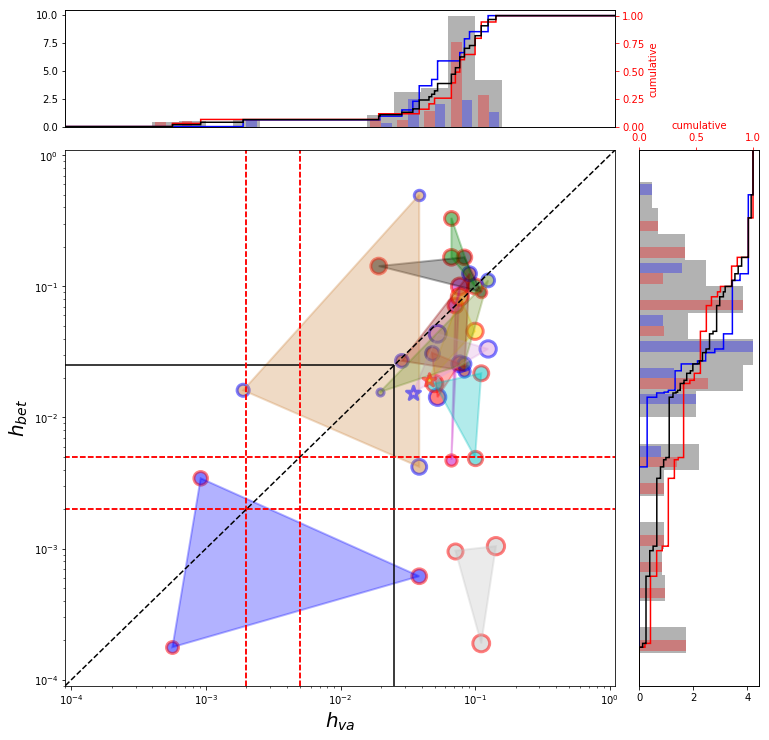

In [10]:
fig = plot_fig(recording, max_tau=None, coupe=[1/500, 1/200])

AM BMC CS DC FM IP LB OP RS SR TN YK 

h_va

MannwhitneyuResult(statistic=128.0, pvalue=0.17561253441711366)
KruskalResult(statistic=0.8992508395763438, pvalue=0.34298266802496824)
Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.2885863663533653)

Coupe à h=0.002, tau=500.0
MannwhitneyuResult(statistic=98.0, pvalue=0.10391795361450779)
KruskalResult(statistic=1.6327540355000327, pvalue=0.20132254954618706)
Ks_2sampResult(statistic=0.3609022556390977, pvalue=0.19197346585749153)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=98.0, pvalue=0.10391795361450779)
KruskalResult(statistic=1.6327540355000327, pvalue=0.20132254954618706)
Ks_2sampResult(statistic=0.3609022556390977, pvalue=0.19197346585749153)


h_bet

MannwhitneyuResult(statistic=145.0, pvalue=0.35003635270100397)
KruskalResult(statistic=0.16102022414015577, pvalue=0.6882189531620186)
Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.2885863663533653)

Coupe à h=0.002, tau=500.0
MannwhitneyuResult(statistic=9

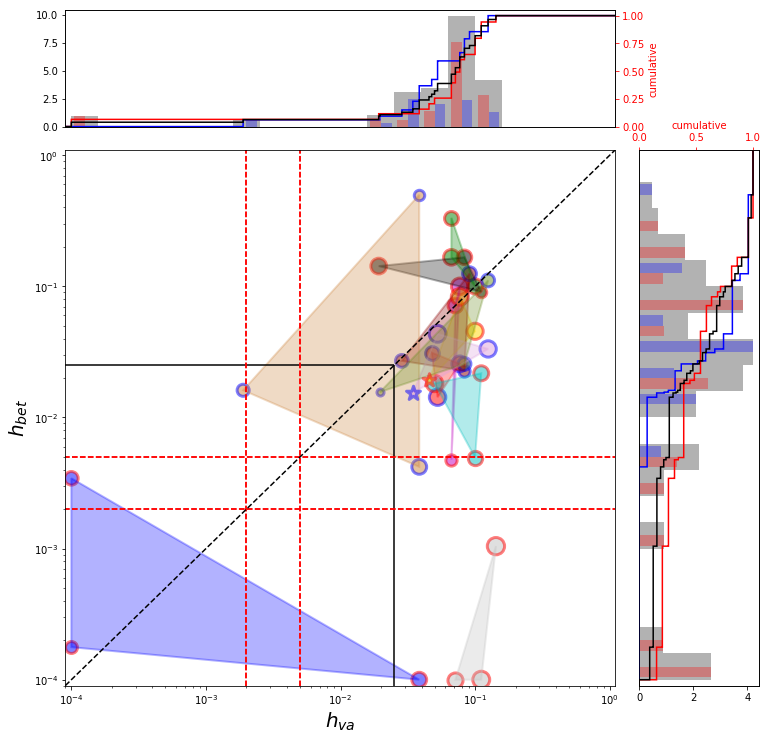

In [11]:
fig = plot_fig(recording, max_tau=None, coupe=[1/500, 1/200], pourcentage=None)
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
for ext in exts: fig.savefig('{msfigpath}/5_inter-individual_differences_fit'.format(msfigpath=msfigpath) + ext, dpi=dpi)

AM BMC CS DC FM IP LB OP RS SR TN YK 

h_va

MannwhitneyuResult(statistic=113.0, pvalue=0.07863620215317485)
KruskalResult(statistic=2.0459770114942413, pvalue=0.15260898123752092)
Ks_2sampResult(statistic=0.3619047619047619, pvalue=0.15865361228591657)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=98.0, pvalue=0.04272333775629982)
KruskalResult(statistic=3.015848915131933, pvalue=0.0824542724933137)
Ks_2sampResult(statistic=0.4, pvalue=0.10191783128372278)


h_bet

MannwhitneyuResult(statistic=152.5, pvalue=0.44258028009236416)
KruskalResult(statistic=0.025753283543646727, pvalue=0.8725043171851955)
Ks_2sampResult(statistic=0.2761904761904762, pvalue=0.4374420920182196)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=90.5, pvalue=0.19123065720413485)
KruskalResult(statistic=0.7995306088367152, pvalue=0.3712337468192414)
Ks_2sampResult(statistic=0.4107142857142857, pvalue=0.11768107002570272)


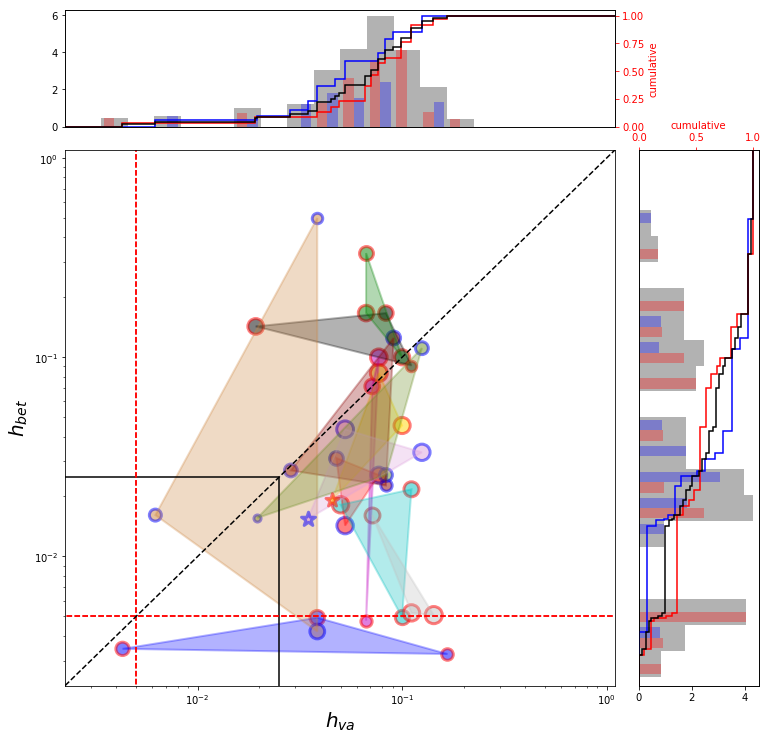

In [12]:
fig = plot_fig(recording, max_tau=401, coupe=[1/200])

AM BMC CS DC FM IP LB OP RS SR TN YK 

h_va

MannwhitneyuResult(statistic=113.5, pvalue=0.08094018904966882)
KruskalResult(statistic=2.001809486881218, pvalue=0.15711155150865413)
Ks_2sampResult(statistic=0.3619047619047619, pvalue=0.15865361228591657)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=113.5, pvalue=0.08094018904966882)
KruskalResult(statistic=2.001809486881218, pvalue=0.15711155150865413)
Ks_2sampResult(statistic=0.3619047619047619, pvalue=0.15865361228591657)


h_bet

MannwhitneyuResult(statistic=97.0, pvalue=0.02705296279960825)
KruskalResult(statistic=3.7715095311694853, pvalue=0.0521325644775012)
Ks_2sampResult(statistic=0.5142857142857142, pvalue=0.012162526421798936)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=97.0, pvalue=0.047712235366758386)
KruskalResult(statistic=2.836851028608803, pvalue=0.0921245920022706)
Ks_2sampResult(statistic=0.5, pvalue=0.022043256877684714)


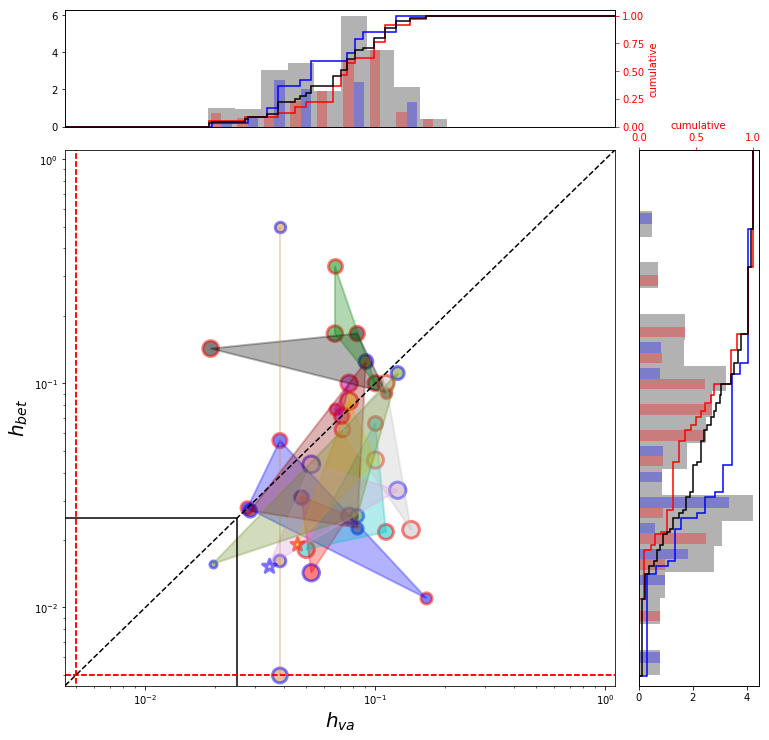

In [13]:
fig = plot_fig(recording, max_tau=201, coupe=[1/200], pourcentage=0.95)

AM BMC CS DC FM IP LB OP RS SR TN YK 

h_va

MannwhitneyuResult(statistic=112.5, pvalue=0.07629124243634051)
KruskalResult(statistic=2.0924825626452974, pvalue=0.1480253564608541)
Ks_2sampResult(statistic=0.3619047619047619, pvalue=0.15865361228591657)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=98.0, pvalue=0.07280665220992306)
KruskalResult(statistic=2.168947529917163, pvalue=0.14082258303321188)
Ks_2sampResult(statistic=0.37142857142857144, pvalue=0.15695564471228796)


h_bet

MannwhitneyuResult(statistic=147.0, pvalue=0.3731794073206708)
KruskalResult(statistic=0.11533934876421784, pvalue=0.7341453710543815)
Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.2885863663533653)

Coupe à h=0.005, tau=200.0
MannwhitneyuResult(statistic=52.0, pvalue=0.030803538792865355)
KruskalResult(statistic=3.5849155427523853, pvalue=0.05830638046447248)
Ks_2sampResult(statistic=0.554945054945055, pvalue=0.020939162341774065)


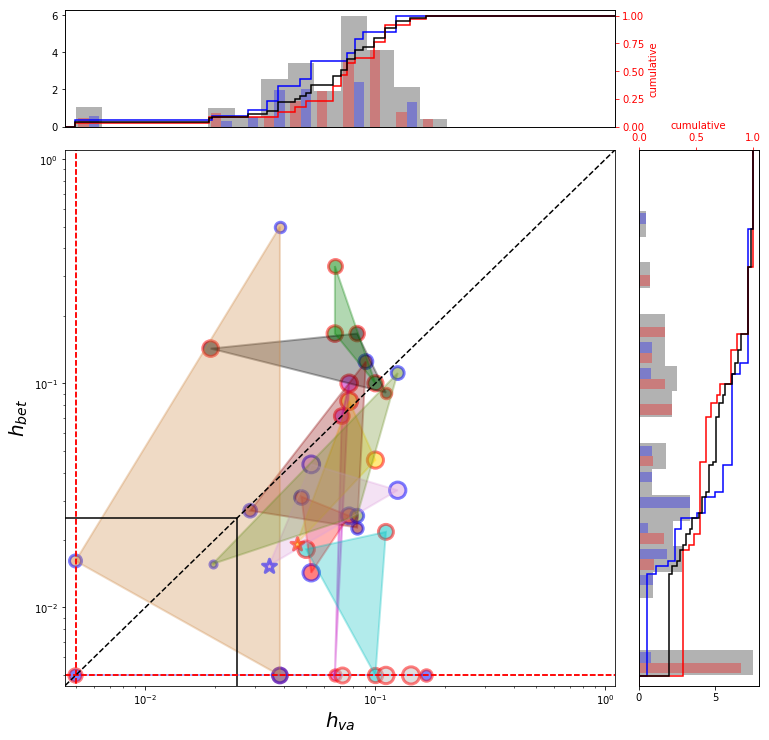

In [14]:
fig = plot_fig(recording, max_tau=201, coupe=[1/200], pourcentage=None)